In [2]:
from gcrnet.utils import simulate_data
from gcrnet.gcrnet import GCRNet
import numpy as np
import pandas as pd
import torch


## Prepare dataset

In [3]:
train_data=simulate_data(n_samples=300, n_features=20, scale=2, shape=2)
test_data=simulate_data(n_samples=300, n_features=20, scale=2, shape=2)

## Standardize dataset 

In [5]:
# # standardize dataset in real application
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit the scaler on the training data
# scaler.fit(train_data['X'])
# train_data['X'] = scaler.fit_transform(train_data['X'])
# test_data['X'] = scaler.fit_transform(test_data['X'])

## Instantiate the GCRNet trainer

In [3]:
lam=np.exp(np.linspace(np.log(0.01),np.log(0.5), 50))
gmcp_net = GCRNet(task_type='cox',device=torch.device("cpu"), input_dim=train_data['X'].shape[1], output_dim=1, hidden_dims=[10,5], activation="relu",
    optimizer="Adam",learning_rate=0.001, batch_size=train_data['X'].shape[0], 
    alpha=0.01, lam=lam, penalty="MCP",drop_input=True)



## Train model

In [4]:
#param_grid={'alpha':np.exp(np.linspace(np.log(0.001),np.log(0.1), 10))}
param_grid={'alpha':[0.02]}
gmcp_net= gmcp_net.fit_and_validate(X=train_data['X'], y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T']}), 
                              param_grid=param_grid, num_epochs=200, verbose=True, print_interval=200)

Epoch: 200: loss=4.196080684661865
Epoch: 400: loss=3.9768481254577637
Epoch: 600: loss=3.8279173374176025
Epoch: 800: loss=3.77876877784729
Epoch: 1000: loss=3.7194466590881348
Epoch: 1200: loss=3.6928164958953857
Epoch: 1400: loss=3.6874735355377197
Epoch: 1600: loss=3.6854543685913086
Epoch: 1800: loss=3.684647560119629
Epoch: 2000: loss=3.67197847366333
Lambda0=0.010000000000000004, size=18
Epoch: 200: loss=3.6584549888416804
Lambda1=0.010831107274360414, size=18
Epoch: 200: loss=3.6562373579377
Lambda2=0.011731288478870311, size=18
Epoch: 200: loss=3.6561075738451985
Lambda3=0.012706284398111268, size=18
Epoch: 200: loss=3.65717071101582
Lambda4=0.013762312937447512, size=18
Epoch: 200: loss=3.664378190945297
Lambda5=0.014906108776881212, size=18
Epoch: 200: loss=3.674430726763056
Lambda6=0.01614496632056856, size=18
Epoch: 200: loss=3.6863601126438708
Lambda7=0.017486786215901412, size=18
Epoch: 200: loss=3.7006617231656893
Lambda8=0.018940125738823508, size=18
Epoch: 200: loss=3

## Solution path

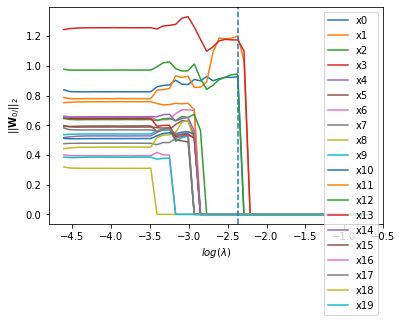

[ True  True  True  True False False False False False False False False
 False False False False False False False False]
best_lam=0.09350611267692986, best_params={'alpha': 0.02}


In [8]:
gmcp_net.plot_solution_path(legend=True, best=True)
print(gmcp_net.get_selection())
print(f'best_lam={gmcp_net.lam[gmcp_net.best_lam_ind]}, best_params={gmcp_net.best_params}')

## Evaluating the model

In [9]:
CI_train = gmcp_net.score(X=train_data['X'], y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T']}), best=True)
CI_test=gmcp_net.score(X=test_data['X'], y=pd.DataFrame({'E': test_data['E'], 'T': test_data['T']}), best=True)
print(f'train_CI={CI_train} test_CI={CI_test}')

train_CI=0.8566907316081143 test_CI=0.8337945481818652
